# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. How many neighborhood groups are available and which shows up the most?
2. Are private rooms the most popular in manhattan?
3. Which hosts are the busiest and based on their reviews?
4. Which neighorhood group has the highest average price?
5. Which neighborhood group has the highest total price?
6. Which top 5 hosts have the highest total price?
7. Who currently has no (zero) availability with a review count of 100 or more?
8. What host has the highest total of prices and where are they located?
9. When did Danielle from Queens last receive a review?
10. 

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
ab = air_bnb
ab.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [76]:
# How many neighbourhood groups / which shows up the most
x = len(ab.groupby('neighbourhood_group', as_index=False))
print(x)
ab['neighbourhood_group'].value_counts()

5


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

,host_name,last_review,name,neighbourhood_group,room_type
22469,Danielle,2019-07-08,Cute Tiny Room Family Home by LGA NO CLEANING FEE,Queens,Private room
21517,Danielle,2019-07-07,Sun Room Family Home LGA Airport NO CLEANING FEE,Queens,Private room
20403,Danielle,2019-07-06,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,Private room


In [107]:
# Private most popular in Manhattan?
a = ab.loc[ab['room_type'] == 'Private room']
m = a.loc[a['neighbourhood_group']== 'Manhattan']

# a.groupby(['name','room_type']).mean().sort_values('reviews_per_month', ascending=False)
# m.groupby('name', as_index = False).mean().round(decimals = 2)[['name','number_of_reviews','reviews_per_month']]
pop = m.sort_values(by="number_of_reviews", ascending=False)[['name','number_of_reviews','reviews_per_month']]
pop.head(5)
pop.head(1)

,name,number_of_reviews,reviews_per_month
2031,Great Bedroom in Manhattan,607,7.75


In [110]:
# Which host is busiest based on num of reviews
hostWithMost = ab.sort_values(by="number_of_reviews", ascending=False)[['name','host_id','host_name','number_of_reviews']]
hostWithMost.head(1)

,name,host_id,host_name,number_of_reviews
11759,Room near JFK Queen Bed,47621202,Dona,629


In [114]:
# Which neighborhood group has highest avg price
# ng = ab.sort_values(by="number_of_reviews", ascending=False)[['name','host_id','host_name','number_of_reviews']]
hap = ab.groupby('neighbourhood_group').mean()[['price']]
hap.sort_values(by='price', ascending=False).head(1)


,price
neighbourhood_group,
Manhattan,196.875814


In [124]:
# Which group has the highest total price
# x= ab.sort_values(by="price", ascending=False,)[['name','neighbourhood_group','price']]
# x.head(1)
htp = ab.groupby('neighbourhood_group').sum()[['price']]
high_hood = htp.sort_values(by='price', ascending=False)
high_hood.head(1)


,price
neighbourhood_group,
Manhattan,4264527


In [130]:
# top 5 hosts by total price
host_total = ab.groupby('host_name').sum()[['price']]
host_total_price = host_total.sort_values(by='price', ascending=False)
host_total_price.head(5)

,price
host_name,
Sonder (NYC),82795
Blueground,70331
Michael,66895
David,65844
Alex,52563


In [156]:
# Who has no (zero) availability with a review count of 100 or more
no_avail = ab.loc[ab['availability_365'] == 0]
no_avail.sort_values(by="number_of_reviews", ascending=False)[['host_name','number_of_reviews', 'availability_365']].head(162)

,host_name,number_of_reviews,availability_365
471,Wanda,480,0
9974,Gurpreet Singh,424,0
9976,Gurpreet Singh,408,0
22104,Deloris,368,0
5876,Veronica,351,0
...,...,...,...
5411,Jake,101,0
18230,Marisha,100,0
19459,Raymond,100,0
12375,Abraham,100,0


In [150]:
# What host has the highest total price and where are they located
HL = ab.sort_values(by="price", ascending=False)[['host_name','price','neighbourhood_group','neighbourhood','latitude','longitude']]


HL.sort_values(by='price', ascending=False).head(10)

,host_name,price,neighbourhood_group,neighbourhood,latitude,longitude
9151,Kathrine,10000,Queens,Astoria,40.76810,-73.91651
29238,Jelena,10000,Manhattan,Upper West Side,40.77213,-73.98665
17692,Erin,10000,Brooklyn,Greenpoint,40.73260,-73.95739
40433,Matt,9999,Manhattan,Lower East Side,40.71980,-73.98566
6530,Olson,9999,Manhattan,East Harlem,40.79264,-73.93898
12342,Amy,9999,Manhattan,Lower East Side,40.71355,-73.98507
30268,Rum,8500,Manhattan,Tribeca,40.72197,-74.00633
4377,Jessica,8000,Brooklyn,Clinton Hill,40.69137,-73.96723
29662,Sally,7703,Manhattan,Upper East Side,40.76824,-73.95989
42523,Jack,7500,Manhattan,Battery Park City,40.71162,-74.01693


In [155]:
# Danielle from Queens last review
dani = ab.loc[ab['host_name']=='Danielle']
dani.sort_values(by='last_review', ascending=False)[['host_name','last_review', 'name','neighbourhood_group', 'room_type']].head(3)

,host_name,last_review,name,neighbourhood_group,room_type
22469,Danielle,2019-07-08,Cute Tiny Room Family Home by LGA NO CLEANING FEE,Queens,Private room
21517,Danielle,2019-07-07,Sun Room Family Home LGA Airport NO CLEANING FEE,Queens,Private room
20403,Danielle,2019-07-06,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,Private room


NameError: name 'df' is not defined

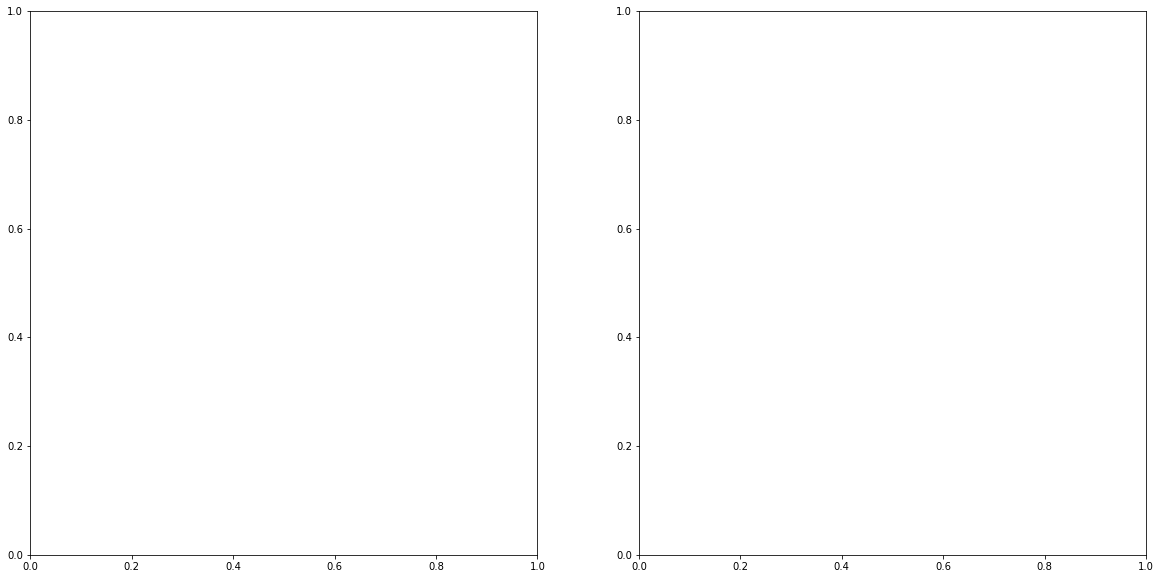

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# first subplot - histogram
ax1.hist(df[df['state']=='California']['ages'], bins=50, label='Ages in Cali')
ax1.set_xlabel('Value', fontname = 'Times New Roman', fontsize = 35)
ax1.set_ylabel('Frequency', fontname = 'Times New Roman', fontsize = 35)
ax1.tick_params(axis='both', labelsize=30)
ax1.legend(loc='upper left', fontsize=30)

## Further Questions

1. Which host has the most listings?

In [175]:
host_count = ab['host_id'].value_counts()
host_count.head(5)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

2. How many listings have completely open availability?

In [185]:
avail = ab.loc[ab['availability_365'] == 365]
avail.sort_values(by="name", ascending=False)[['host_name','number_of_reviews', 'availability_365']].head(1295)

,host_name,number_of_reviews,availability_365
13658,Wendy,0,365
21797,Hao,7,365
47025,Jungyen,4,365
6973,Dong Ming,3,365
45413,Jungyen,9,365
...,...,...,...
21196,Valentin,1,365
21226,Valentin,2,365
21209,Valentin,0,365
4815,Randall,48,365


3. What room_types have the highest review numbers?

In [201]:
x=ab.groupby('room_type').sum()[['number_of_reviews']]
x.sort_values(by="number_of_reviews", ascending=False,).head(3)

,number_of_reviews
room_type,
Entire home/apt,580403
Private room,538346
Shared room,19256


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
Q1: Manhattan holds the most with 21661 units, and Staten Island with the least at 373.
Q2:



Qs1: The host Id 219517861 had the most listings and I believe his name is Micheal

Qs2: 1295

Qs3: A private room has the highest average number of reviews, an entire home has the most reviews, 
a shared room has the highest average number of reviews per month, and an entire home has the most monthly reviews per month.
so I belive the answer is entire hime,